In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Try with minimal parameters first
df = pd.read_csv('news.csv',
                encoding='utf-8',
                # engine='python',
                # on_bad_lines='skip'
                 )

# Check if it loaded
print(f"Loaded {len(df)} rows from the CSV file")

def preprocess_text(text):
    # Fix encoding issues
    text = text.replace('â€™', "'").replace('â€"', '-').replace('â€œ', '"').replace('â€', '"')

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin tokens
    processed_text = ' '.join(tokens)

    return processed_text

# Apply preprocessing to your data
df['text'] = df['text'].apply(preprocess_text)
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loaded 6335 rows from the CSV file


In [2]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,daniel greenfield shillman journalism fellow f...,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,u secretary state john f kerry said monday sto...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november 9 2016 lesso...,0
4,875,The Battle of New York: Why This Primary Matters,primary day new york frontrunners hillary clin...,1


In [3]:
#deleting unwanted columns
df = df.drop("Unnamed: 0", axis = 1)
df = df.drop("title", axis = 1)

In [4]:
df.head()

,text,label
0,daniel greenfield shillman journalism fellow f...,0
1,google pinterest digg linkedin reddit stumbleu...,0
2,u secretary state john f kerry said monday sto...,1
3,— kaydee king kaydeeking november 9 2016 lesso...,0
4,primary day new york frontrunners hillary clin...,1


In [5]:
df.isna().sum()

text     0
label    0
dtype: int64

<Axes: xlabel='label', ylabel='count'>

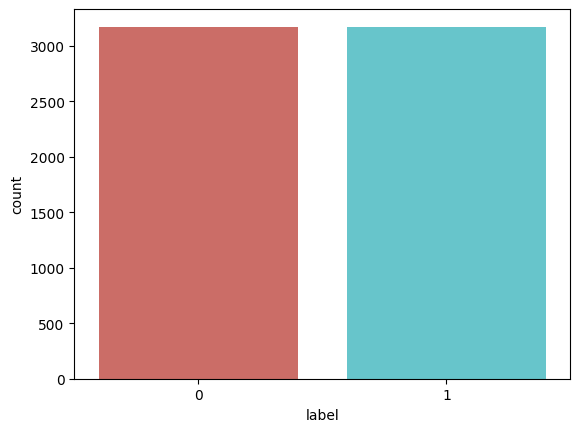

In [6]:
import seaborn as sb
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(df)

In [7]:
df.shape

(6335, 2)

In [8]:
label_train=df.label

In [9]:
label_train.head()

0    0
1    0
2    1
3    0
4    1
Name: label, dtype: int64

In [10]:
df = df.drop("label", axis = 1)

In [11]:
df.head()

,text
0,daniel greenfield shillman journalism fellow f...
1,google pinterest digg linkedin reddit stumbleu...
2,u secretary state john f kerry said monday sto...
3,— kaydee king kaydeeking november 9 2016 lesso...
4,primary day new york frontrunners hillary clin...


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], label_train, test_size=0.2, random_state=42)

In [13]:
X_train

1142    donald trump received key endorsement immigrat...
2654    nina november 6 2016 239 pm polish government ...
5395    time investigating hillary attack woman novemb...
1170    takis magazine october 28 2016 election going ...
4371    pakistan pakistan cricketer turned politician ...
                              ...                        
3772    happened less debate among contender showdown ...
5191    clinton fbigate true depth obamageddon 3110201...
5226    fearing election day trouble u school cancel c...
5390    president obama ’ appearance town hall meeting...
860     man protest international trade agreement ttip...
Name: text, Length: 5068, dtype: object

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)


import joblib
joblib.dump(tfidf_v, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [15]:
print(tfidf_X_train,tfidf_X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1374035 stored elements and shape (5068, 68726)>
  Coords	Values
  (0, 51873)	0.38284180041112065
  (0, 15180)	0.1732586219552413
  (0, 48819)	0.3429313466573881
  (0, 58797)	0.29649782948283526
  (0, 43847)	0.09016441509234237
  (0, 55153)	0.26177560325692645
  (0, 33240)	0.2870082716601877
  (0, 54983)	0.18291967986206978
  (0, 46916)	0.24446045740077973
  (0, 30942)	0.4281336746701755
  (0, 21669)	0.2661249293764186
  (0, 34304)	0.18363351280405465
  (0, 50515)	0.21047990506874914
  (0, 62613)	0.12341356135069305
  (0, 19863)	0.1351868619120224
  (1, 40430)	0.1598826207563327
  (1, 50274)	0.07509351347275157
  (1, 8025)	0.14619164013587882
  (1, 65335)	0.19925746282476584
  (1, 56305)	0.08259471838121665
  (1, 41895)	0.172379951721946
  (1, 6608)	0.21621528428148207
  (1, 28391)	0.08142829189585528
  (1, 27052)	0.058250641162131425
  (1, 66166)	0.04710744833104004
  :	:
  (5067, 43465)	0.02200323088153805
  (5067, 25433)	

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 94.63%
Confusion matrix, without normalization


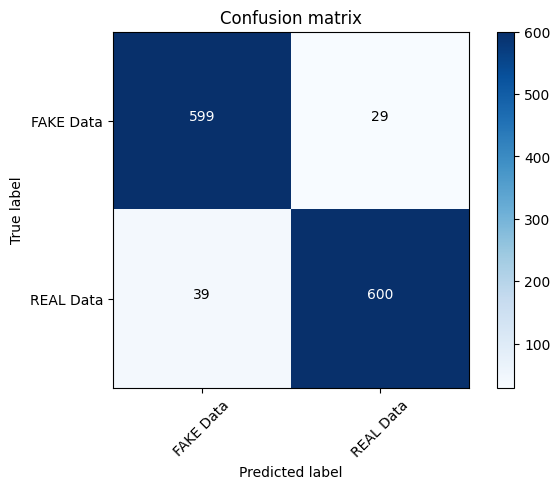

In [22]:
from sklearn import metrics

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=300)

clf.fit(tfidf_X_train,Y_train)
Y_pred = clf.predict(tfidf_X_test)
score_tfidf = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score_tfidf*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Accuracy: 93.84%
Confusion matrix, without normalization


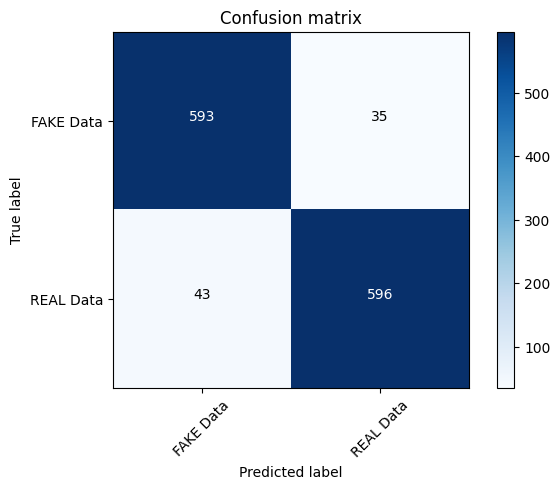

In [27]:

from sklearn import metrics
from sklearn.svm import SVC
clf= SVC(kernel='linear')
clf.fit(tfidf_X_train,Y_train)

Y_pred = clf.predict(tfidf_X_test)
SVC_score_tfidf = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(SVC_score_tfidf*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Accuracy: 93.29%
Confusion matrix, without normalization


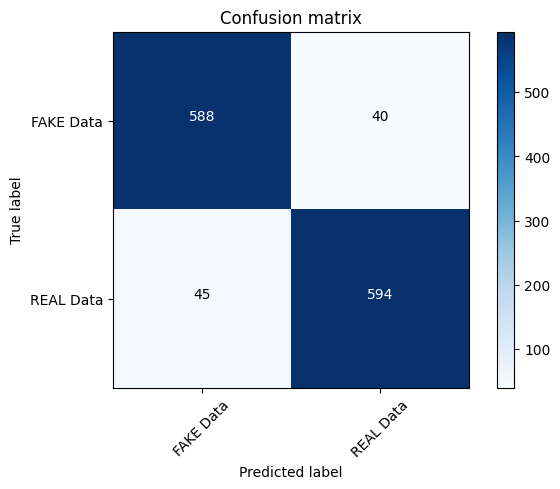

In [28]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

model.fit(tfidf_X_train,Y_train)

from sklearn import metrics
Y_pred = model.predict(tfidf_X_test)
XGB_score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(XGB_score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Accuracy: 90.84%
Confusion matrix, without normalization


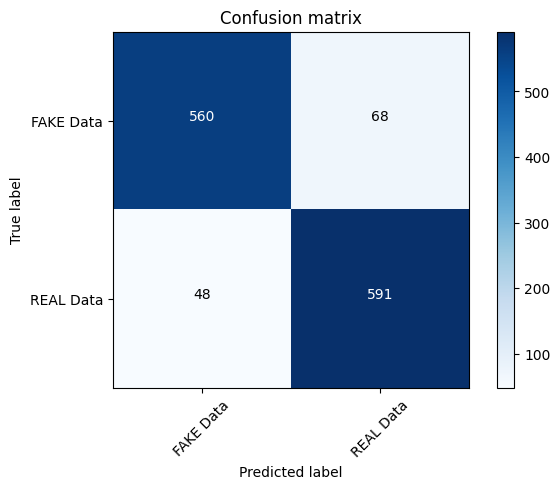

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(tfidf_X_train,Y_train)

Y_pred = clf.predict(tfidf_X_test)
RandomForest_score_tfidf = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(RandomForest_score_tfidf*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

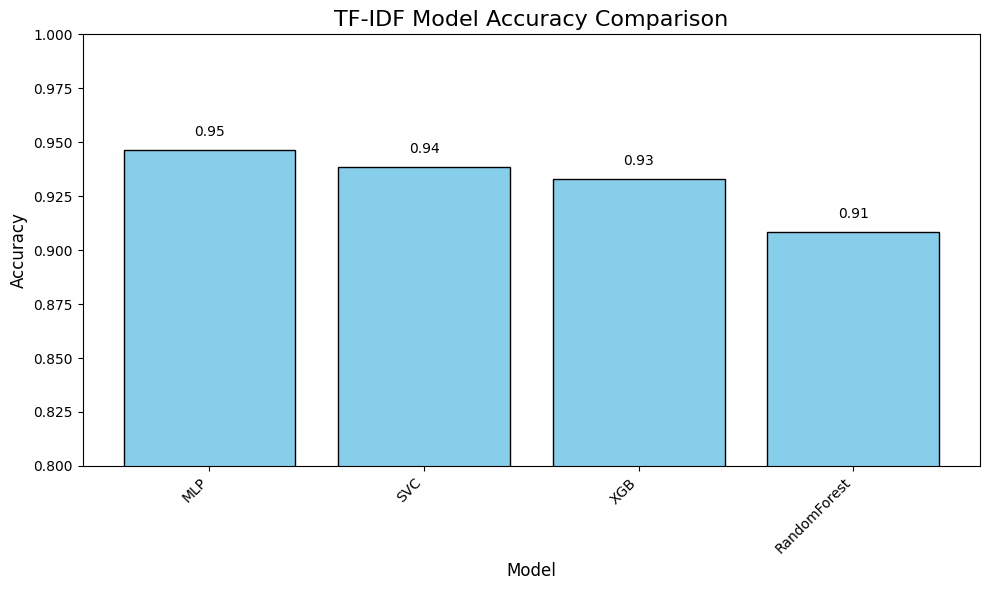

In [ ]:
import matplotlib.pyplot as plt

# Example: Model names and their accuracies
Count_model_names = ['MLP','SVC','XGB','RandomForest']

accuracies = [score_tfidf,SVC_score_tfidf,XGB_score,RandomForest_score_tfidf]  # replace with your actual accuracy scores

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(Count_model_names, accuracies, color='skyblue', edgecolor='black')
plt.ylim(0.8, 1.0)  # Set y-axis range for better focus
plt.title('TF-IDF Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Annotate accuracy values on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.005,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [23]:
import joblib

# Save the model to a file
joblib.dump(clf, 'mlp_classifier_model.pkl')

['mlp_classifier_model.pkl']

# CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import joblib

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform on training data
X_train_count = count_vectorizer.fit_transform(X_train)

# Transform test data
X_test_count = count_vectorizer.transform(X_test)

# Save the vectorizer
joblib.dump(count_vectorizer, 'count_vectorizer.pkl')

# # To verify
# print("Vocabulary:", count_vectorizer.vocabulary_)
# print("Train feature matrix:\n", X_train_count.toarray())
# print("Test feature matrix:\n", X_test_count.toarray())

['count_vectorizer.pkl']

Accuracy: 92.11%
Confusion matrix, without normalization


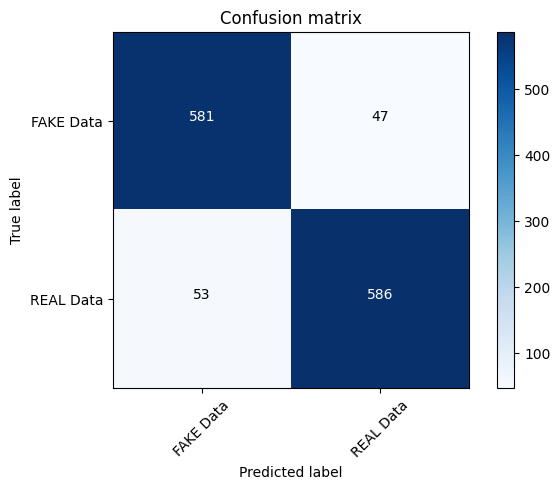

In [25]:
from sklearn import metrics

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=300)

clf.fit(X_train_count,Y_train)
Y_pred = clf.predict(X_test_count)
score_Count = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score_Count*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Accuracy: 88.4%
Confusion matrix, without normalization


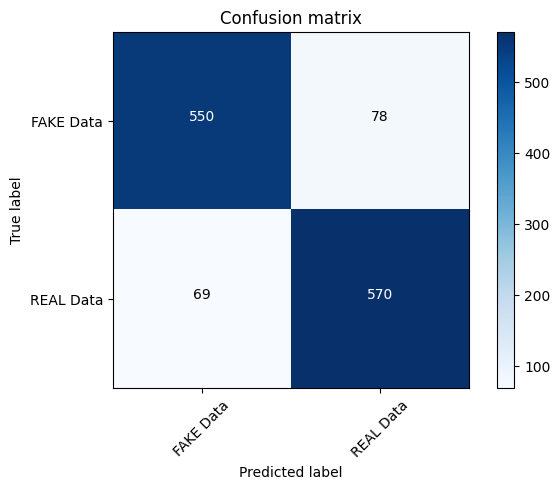

In [31]:
from sklearn import metrics
from sklearn.svm import SVC
clf= SVC(kernel='linear')
clf.fit(X_train_count,Y_train)

Y_pred = clf.predict(X_test_count)
SVC_score_Count = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(SVC_score_Count*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Accuracy: 92.58%
Confusion matrix, without normalization


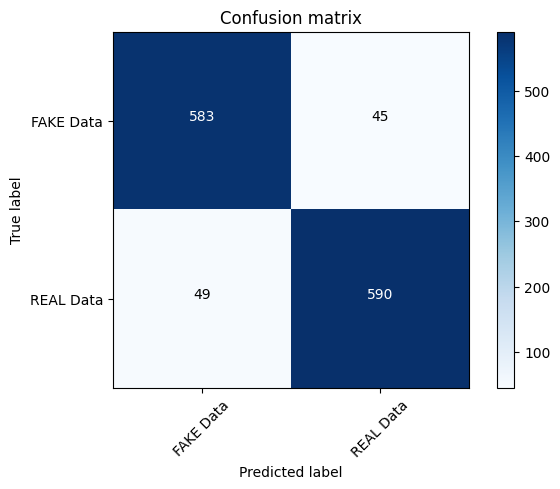

In [32]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

model.fit(X_train_count,Y_train)

from sklearn import metrics
Y_pred = model.predict(X_test_count)
XGB_score_Count = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(XGB_score_Count*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Accuracy: 90.61%
Confusion matrix, without normalization


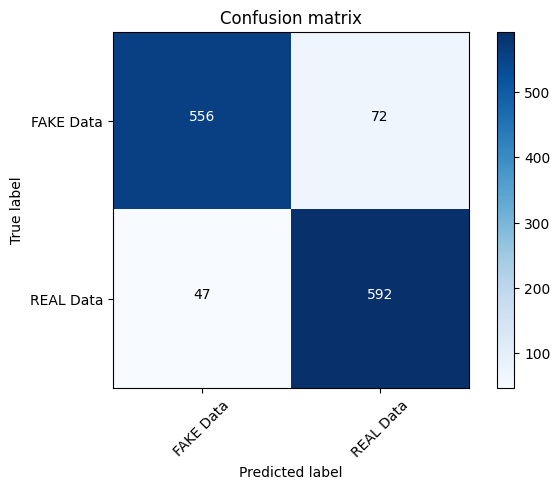

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train_count,Y_train)

Y_pred = clf.predict(X_test_count)
RandomForest_score_Count = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(RandomForest_score_Count*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

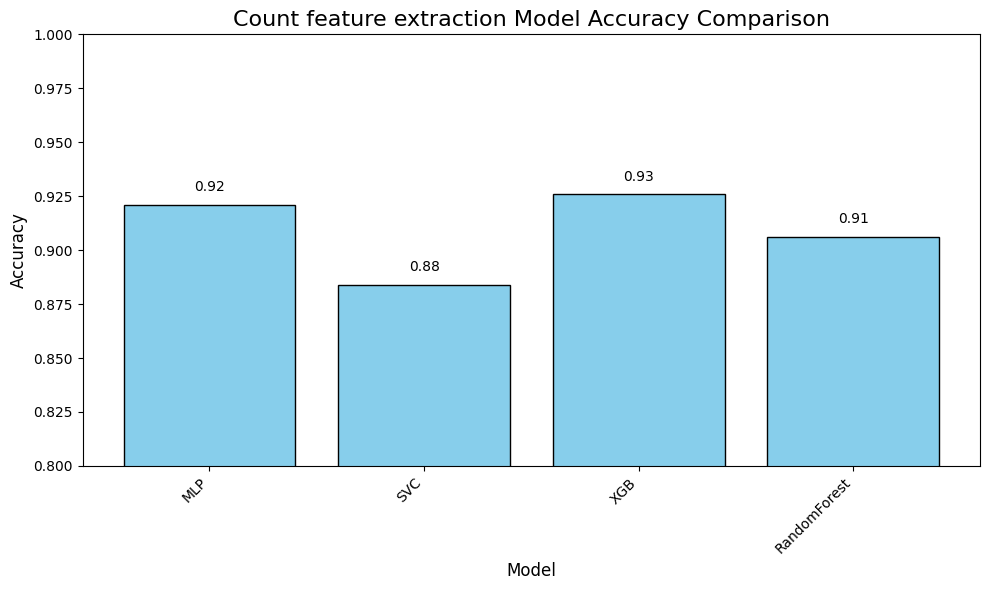

In [35]:
import matplotlib.pyplot as plt

# Example: Model names and their accuracies
Count_model_names = ['MLP','SVC','XGB','RandomForest']

accuracies = [score_Count,SVC_score_Count,XGB_score_Count,RandomForest_score_Count]  # replace with your actual accuracy scores

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(Count_model_names, accuracies, color='skyblue', edgecolor='black')
plt.ylim(0.8, 1.0)  # Set y-axis range for better focus
plt.title('Count feature extraction Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Annotate accuracy values on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.005,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# comparison between greatest model in each feature extraction 

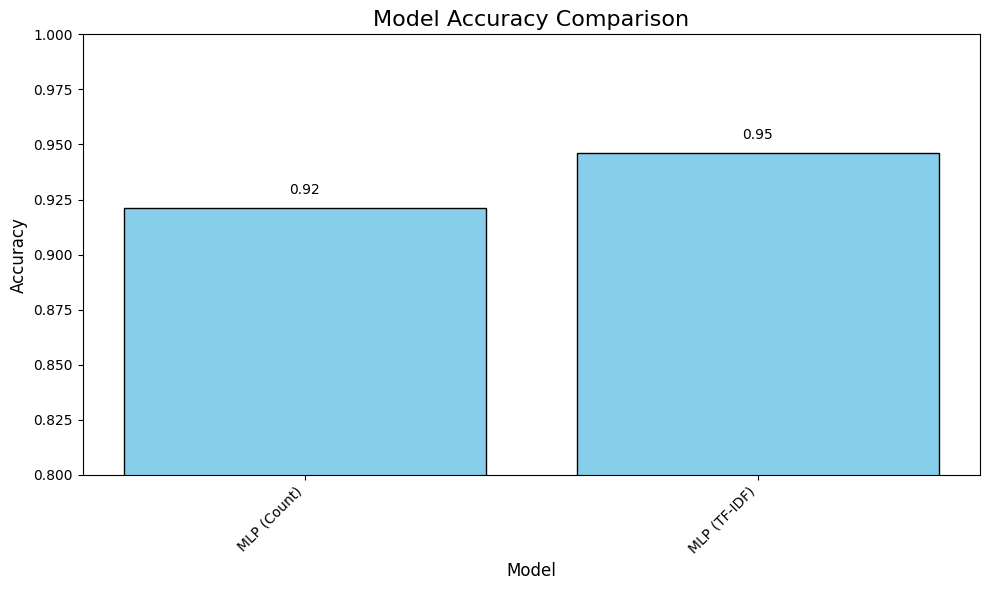

In [26]:
import matplotlib.pyplot as plt

# Example: Model names and their accuracies
Count_model_names = ['MLP (Count)','MLP (TF-IDF)']

accuracies = [score_Count,score_tfidf]  # replace with your actual accuracy scores

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(Count_model_names, accuracies, color='skyblue', edgecolor='black')
plt.ylim(0.8, 1.0)  # Set y-axis range for better focus
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Annotate accuracy values on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.005,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
